In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, LeaveOneOut, cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, Matern, DotProduct
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from plotfunc import plot_result, cross_validate_and_plot, plot_learning_curve, plot_with_err

import seaborn as sns

In [2]:
lo = LeaveOneOut()

In [3]:
data = pd.read_csv('data_tc.csv')

In [5]:
columns =  ['Fe', 'Cr', 'Ni', 'Mo',
       'Mn', 'C', 'Ti', 'Si', 'Nb', 'V', 'P', 'B', 'Al', 'N', 'S', 'Co', 'Cu',
       'W', 'As',  'HT stage 1 temperature',
       'HT stage 1 duration', 'HT stage 1 cooling', 'HT stage 2 temperature', 
        'HT stage 2 duration', 'HT stage 2 cooling']
y = data['MR HCP_A3#2']

<AxesSubplot: >

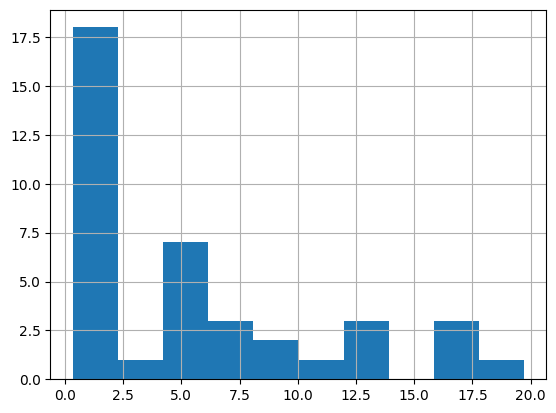

In [6]:
y.hist()

In [7]:
X = np.array(data[columns])
y = np.array(y)

# Lasso

In [8]:
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]
pipeline = Pipeline(steps)

params = {
    'lasso__alpha':np.linspace(1e-5, 1e1, 100)
}

grid = GridSearchCV(pipeline, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 100 candidates, totalling 3900 fits
[CV 1/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 1/39; 1/100] END ......lasso__alpha=1e-05;, score=-16.751 total time=   0.0s
[CV 2/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 2/39; 1/100] END .......lasso__alpha=1e-05;, score=-2.154 total time=   0.0s
[CV 3/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 3/39; 1/100] END ......lasso__alpha=1e-05;, score=-35.724 total time=   0.0s
[CV 4/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 4/39; 1/100] END .......lasso__alpha=1e-05;, score=-0.682 total time=   0.0s
[CV 5/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 5/39; 1/100] END ......lasso__alpha=1e-05;, score=-75.207 total time=   0.0s
[CV 6/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 6/39; 1/100] END .......lasso__alpha=1e-

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+02, tolerance: 1.193e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+02, tolerance: 1.201e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 25/39; 2/100] END ...lasso__alpha=0.10102;, score=-26.174 total time=   0.0s
[CV 26/39; 2/100] START lasso__alpha=0.10102....................................
[CV 26/39; 2/100] END ...lasso__alpha=0.10102;, score=-26.324 total time=   0.0s
[CV 27/39; 2/100] START lasso__alpha=0.10102....................................
[CV 27/39; 2/100] END ....lasso__alpha=0.10102;, score=-0.559 total time=   0.0s
[CV 28/39; 2/100] START lasso__alpha=0.10102....................................
[CV 28/39; 2/100] END ..lasso__alpha=0.10102;, score=-114.070 total time=   0.0s
[CV 29/39; 2/100] START lasso__alpha=0.10102....................................
[CV 29/39; 2/100] END ....lasso__alpha=0.10102;, score=-0.079 total time=   0.0s
[CV 30/39; 2/100] START lasso__alpha=0.10102....................................
[CV 30/39; 2/100] END ....lasso__alpha=0.10102;, score=-1.758 total time=   0.0s
[CV 31/39; 2/100] START lasso__alpha=0.10102....................................
[CV 31/39; 2/100] END ....la

[CV 12/39; 5/100] END ...lasso__alpha=0.40405;, score=-14.437 total time=   0.0s
[CV 13/39; 5/100] START lasso__alpha=0.40405....................................
[CV 13/39; 5/100] END ....lasso__alpha=0.40405;, score=-6.334 total time=   0.0s
[CV 14/39; 5/100] START lasso__alpha=0.40405....................................
[CV 14/39; 5/100] END ...lasso__alpha=0.40405;, score=-23.038 total time=   0.0s
[CV 15/39; 5/100] START lasso__alpha=0.40405....................................
[CV 15/39; 5/100] END ....lasso__alpha=0.40405;, score=-2.480 total time=   0.0s
[CV 16/39; 5/100] START lasso__alpha=0.40405....................................
[CV 16/39; 5/100] END ..lasso__alpha=0.40405;, score=-122.652 total time=   0.0s
[CV 17/39; 5/100] START lasso__alpha=0.40405....................................
[CV 17/39; 5/100] END ....lasso__alpha=0.40405;, score=-2.339 total time=   0.0s
[CV 18/39; 5/100] START lasso__alpha=0.40405....................................
[CV 18/39; 5/100] END ....la

[CV 24/39; 7/100] END ....lasso__alpha=0.60607;, score=-1.254 total time=   0.0s
[CV 25/39; 7/100] START lasso__alpha=0.60607....................................
[CV 25/39; 7/100] END ...lasso__alpha=0.60607;, score=-27.154 total time=   0.0s
[CV 26/39; 7/100] START lasso__alpha=0.60607....................................
[CV 26/39; 7/100] END ....lasso__alpha=0.60607;, score=-7.499 total time=   0.0s
[CV 27/39; 7/100] START lasso__alpha=0.60607....................................
[CV 27/39; 7/100] END ....lasso__alpha=0.60607;, score=-1.456 total time=   0.0s
[CV 28/39; 7/100] START lasso__alpha=0.60607....................................
[CV 28/39; 7/100] END ...lasso__alpha=0.60607;, score=-50.628 total time=   0.0s
[CV 29/39; 7/100] START lasso__alpha=0.60607....................................
[CV 29/39; 7/100] END ....lasso__alpha=0.60607;, score=-1.980 total time=   0.0s
[CV 30/39; 7/100] START lasso__alpha=0.60607....................................
[CV 30/39; 7/100] END ....la

[CV 33/39; 9/100] END ...lasso__alpha=0.80809;, score=-13.090 total time=   0.0s
[CV 34/39; 9/100] START lasso__alpha=0.80809....................................
[CV 34/39; 9/100] END ....lasso__alpha=0.80809;, score=-5.904 total time=   0.0s
[CV 35/39; 9/100] START lasso__alpha=0.80809....................................
[CV 35/39; 9/100] END ...lasso__alpha=0.80809;, score=-22.847 total time=   0.0s
[CV 36/39; 9/100] START lasso__alpha=0.80809....................................
[CV 36/39; 9/100] END ....lasso__alpha=0.80809;, score=-3.193 total time=   0.0s
[CV 37/39; 9/100] START lasso__alpha=0.80809....................................
[CV 37/39; 9/100] END ....lasso__alpha=0.80809;, score=-1.408 total time=   0.0s
[CV 38/39; 9/100] START lasso__alpha=0.80809....................................
[CV 38/39; 9/100] END ....lasso__alpha=0.80809;, score=-0.453 total time=   0.0s
[CV 39/39; 9/100] START lasso__alpha=0.80809....................................
[CV 39/39; 9/100] END ...las

[CV 35/39; 11/100] END ..lasso__alpha=1.01011;, score=-23.680 total time=   0.0s
[CV 36/39; 11/100] START lasso__alpha=1.01011...................................
[CV 36/39; 11/100] END ...lasso__alpha=1.01011;, score=-4.439 total time=   0.0s
[CV 37/39; 11/100] START lasso__alpha=1.01011...................................
[CV 37/39; 11/100] END ...lasso__alpha=1.01011;, score=-2.810 total time=   0.0s
[CV 38/39; 11/100] START lasso__alpha=1.01011...................................
[CV 38/39; 11/100] END ...lasso__alpha=1.01011;, score=-1.322 total time=   0.0s
[CV 39/39; 11/100] START lasso__alpha=1.01011...................................
[CV 39/39; 11/100] END ..lasso__alpha=1.01011;, score=-11.676 total time=   0.0s
[CV 1/39; 12/100] START lasso__alpha=1.11112....................................
[CV 1/39; 12/100] END ....lasso__alpha=1.11112;, score=-1.739 total time=   0.0s
[CV 2/39; 12/100] START lasso__alpha=1.11112....................................
[CV 2/39; 12/100] END ...las

[CV 25/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-17.644 total time=   0.0s
[CV 26/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 26/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-6.202 total time=   0.0s
[CV 27/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 27/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-7.072 total time=   0.0s
[CV 28/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 28/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-27.408 total time=   0.0s
[CV 29/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 29/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-7.373 total time=   0.0s
[CV 30/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 30/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-4.010 total time=   0.0s
[CV 31/39; 14/100] START lasso__alpha=1.3131400000000002...

[CV 5/39; 17/100] END ....lasso__alpha=1.61617;, score=-3.172 total time=   0.0s
[CV 6/39; 17/100] START lasso__alpha=1.61617....................................
[CV 6/39; 17/100] END ...lasso__alpha=1.61617;, score=-34.934 total time=   0.0s
[CV 7/39; 17/100] START lasso__alpha=1.61617....................................
[CV 7/39; 17/100] END ...lasso__alpha=1.61617;, score=-14.464 total time=   0.0s
[CV 8/39; 17/100] START lasso__alpha=1.61617....................................
[CV 8/39; 17/100] END ....lasso__alpha=1.61617;, score=-1.720 total time=   0.0s
[CV 9/39; 17/100] START lasso__alpha=1.61617....................................
[CV 9/39; 17/100] END ...lasso__alpha=1.61617;, score=-21.040 total time=   0.0s
[CV 10/39; 17/100] START lasso__alpha=1.61617...................................
[CV 10/39; 17/100] END .lasso__alpha=1.61617;, score=-155.573 total time=   0.0s
[CV 11/39; 17/100] START lasso__alpha=1.61617...................................
[CV 11/39; 17/100] END ..las

[CV 34/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-6.528 total time=   0.0s
[CV 35/39; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 35/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-21.188 total time=   0.0s
[CV 36/39; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 36/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-11.204 total time=   0.0s
[CV 37/39; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 37/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-9.452 total time=   0.0s
[CV 38/39; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 38/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-6.640 total time=   0.0s
[CV 39/39; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 39/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-6.132 total time=   0.0s
[CV 1/39; 20/100] START lasso__alpha=1.9192................

[CV 26/39; 22/100] END ...lasso__alpha=2.12122;, score=-2.283 total time=   0.0s
[CV 27/39; 22/100] START lasso__alpha=2.12122...................................
[CV 27/39; 22/100] END ..lasso__alpha=2.12122;, score=-13.340 total time=   0.0s
[CV 28/39; 22/100] START lasso__alpha=2.12122...................................
[CV 28/39; 22/100] END ..lasso__alpha=2.12122;, score=-12.769 total time=   0.0s
[CV 29/39; 22/100] START lasso__alpha=2.12122...................................
[CV 29/39; 22/100] END ..lasso__alpha=2.12122;, score=-15.162 total time=   0.0s
[CV 30/39; 22/100] START lasso__alpha=2.12122...................................
[CV 30/39; 22/100] END ..lasso__alpha=2.12122;, score=-12.532 total time=   0.0s
[CV 31/39; 22/100] START lasso__alpha=2.12122...................................
[CV 31/39; 22/100] END ..lasso__alpha=2.12122;, score=-16.154 total time=   0.0s
[CV 32/39; 22/100] START lasso__alpha=2.12122...................................
[CV 32/39; 22/100] END ...la

[CV 27/39; 24/100] END ..lasso__alpha=2.32324;, score=-15.090 total time=   0.0s
[CV 28/39; 24/100] START lasso__alpha=2.32324...................................
[CV 28/39; 24/100] END ..lasso__alpha=2.32324;, score=-10.092 total time=   0.0s
[CV 29/39; 24/100] START lasso__alpha=2.32324...................................
[CV 29/39; 24/100] END ..lasso__alpha=2.32324;, score=-17.504 total time=   0.0s
[CV 30/39; 24/100] START lasso__alpha=2.32324...................................
[CV 30/39; 24/100] END ..lasso__alpha=2.32324;, score=-15.276 total time=   0.0s
[CV 31/39; 24/100] START lasso__alpha=2.32324...................................
[CV 31/39; 24/100] END ..lasso__alpha=2.32324;, score=-18.250 total time=   0.0s
[CV 32/39; 24/100] START lasso__alpha=2.32324...................................
[CV 32/39; 24/100] END ...lasso__alpha=2.32324;, score=-3.407 total time=   0.0s
[CV 33/39; 24/100] START lasso__alpha=2.32324...................................
[CV 33/39; 24/100] END ...la

[CV 29/39; 27/100] END lasso__alpha=2.6262700000000003;, score=-21.331 total time=   0.0s
[CV 30/39; 27/100] START lasso__alpha=2.6262700000000003........................
[CV 30/39; 27/100] END lasso__alpha=2.6262700000000003;, score=-19.902 total time=   0.0s
[CV 31/39; 27/100] START lasso__alpha=2.6262700000000003........................
[CV 31/39; 27/100] END lasso__alpha=2.6262700000000003;, score=-21.632 total time=   0.0s
[CV 32/39; 27/100] START lasso__alpha=2.6262700000000003........................
[CV 32/39; 27/100] END lasso__alpha=2.6262700000000003;, score=-2.154 total time=   0.0s
[CV 33/39; 27/100] START lasso__alpha=2.6262700000000003........................
[CV 33/39; 27/100] END lasso__alpha=2.6262700000000003;, score=-4.130 total time=   0.0s
[CV 34/39; 27/100] START lasso__alpha=2.6262700000000003........................
[CV 34/39; 27/100] END lasso__alpha=2.6262700000000003;, score=-8.117 total time=   0.0s
[CV 35/39; 27/100] START lasso__alpha=2.6262700000000003..

[CV 16/39; 30/100] END ..lasso__alpha=2.9293;, score=-156.980 total time=   0.0s
[CV 17/39; 30/100] START lasso__alpha=2.9293....................................
[CV 17/39; 30/100] END ....lasso__alpha=2.9293;, score=-8.452 total time=   0.0s
[CV 18/39; 30/100] START lasso__alpha=2.9293....................................
[CV 18/39; 30/100] END ....lasso__alpha=2.9293;, score=-8.730 total time=   0.0s
[CV 19/39; 30/100] START lasso__alpha=2.9293....................................
[CV 19/39; 30/100] END ...lasso__alpha=2.9293;, score=-13.890 total time=   0.0s
[CV 20/39; 30/100] START lasso__alpha=2.9293....................................
[CV 20/39; 30/100] END ...lasso__alpha=2.9293;, score=-24.781 total time=   0.0s
[CV 21/39; 30/100] START lasso__alpha=2.9293....................................
[CV 21/39; 30/100] END ...lasso__alpha=2.9293;, score=-24.344 total time=   0.0s
[CV 22/39; 30/100] START lasso__alpha=2.9293....................................
[CV 22/39; 30/100] END ...la

[CV 8/39; 33/100] END ....lasso__alpha=3.23233;, score=-0.604 total time=   0.0s
[CV 9/39; 33/100] START lasso__alpha=3.23233....................................
[CV 9/39; 33/100] END ...lasso__alpha=3.23233;, score=-25.903 total time=   0.0s
[CV 10/39; 33/100] START lasso__alpha=3.23233...................................
[CV 10/39; 33/100] END .lasso__alpha=3.23233;, score=-211.772 total time=   0.0s
[CV 11/39; 33/100] START lasso__alpha=3.23233...................................
[CV 11/39; 33/100] END .lasso__alpha=3.23233;, score=-114.844 total time=   0.0s
[CV 12/39; 33/100] START lasso__alpha=3.23233...................................
[CV 12/39; 33/100] END ..lasso__alpha=3.23233;, score=-51.474 total time=   0.0s
[CV 13/39; 33/100] START lasso__alpha=3.23233...................................
[CV 13/39; 33/100] END ...lasso__alpha=3.23233;, score=-6.099 total time=   0.0s
[CV 14/39; 33/100] START lasso__alpha=3.23233...................................
[CV 14/39; 33/100] END ...la

[CV 34/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-8.542 total time=   0.0s
[CV 35/39; 35/100] START lasso__alpha=3.4343500000000002........................
[CV 35/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-14.460 total time=   0.0s
[CV 36/39; 35/100] START lasso__alpha=3.4343500000000002........................
[CV 36/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-26.894 total time=   0.0s
[CV 37/39; 35/100] START lasso__alpha=3.4343500000000002........................
[CV 37/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-26.093 total time=   0.0s
[CV 38/39; 35/100] START lasso__alpha=3.4343500000000002........................
[CV 38/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-21.653 total time=   0.0s
[CV 39/39; 35/100] START lasso__alpha=3.4343500000000002........................
[CV 39/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-0.353 total time=   0.0s
[CV 1/39; 36/100] START lasso__alpha=3.5353600000000003..

[CV 1/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-28.327 total time=   0.0s
[CV 2/39; 38/100] START lasso__alpha=3.7373800000000004.........................
[CV 2/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-20.141 total time=   0.0s
[CV 3/39; 38/100] START lasso__alpha=3.7373800000000004.........................
[CV 3/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-152.449 total time=   0.0s
[CV 4/39; 38/100] START lasso__alpha=3.7373800000000004.........................
[CV 4/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-66.314 total time=   0.0s
[CV 5/39; 38/100] START lasso__alpha=3.7373800000000004.........................
[CV 5/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-0.212 total time=   0.0s
[CV 6/39; 38/100] START lasso__alpha=3.7373800000000004.........................
[CV 6/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-71.483 total time=   0.0s
[CV 7/39; 38/100] START lasso__alpha=3.7373800000000004......

[CV 20/39; 40/100] END ...lasso__alpha=3.9394;, score=-26.894 total time=   0.0s
[CV 21/39; 40/100] START lasso__alpha=3.9394....................................
[CV 21/39; 40/100] END ...lasso__alpha=3.9394;, score=-26.257 total time=   0.0s
[CV 22/39; 40/100] START lasso__alpha=3.9394....................................
[CV 22/39; 40/100] END ...lasso__alpha=3.9394;, score=-26.093 total time=   0.0s
[CV 23/39; 40/100] START lasso__alpha=3.9394....................................
[CV 23/39; 40/100] END ...lasso__alpha=3.9394;, score=-21.653 total time=   0.0s
[CV 24/39; 40/100] START lasso__alpha=3.9394....................................
[CV 24/39; 40/100] END ...lasso__alpha=3.9394;, score=-12.091 total time=   0.0s
[CV 25/39; 40/100] START lasso__alpha=3.9394....................................
[CV 25/39; 40/100] END ...lasso__alpha=3.9394;, score=-16.996 total time=   0.0s
[CV 26/39; 40/100] START lasso__alpha=3.9394....................................
[CV 26/39; 40/100] END ....l

[CV 5/39; 43/100] END ....lasso__alpha=4.24243;, score=-0.212 total time=   0.0s
[CV 6/39; 43/100] START lasso__alpha=4.24243....................................
[CV 6/39; 43/100] END ...lasso__alpha=4.24243;, score=-71.483 total time=   0.0s
[CV 7/39; 43/100] START lasso__alpha=4.24243....................................
[CV 7/39; 43/100] END ...lasso__alpha=4.24243;, score=-34.297 total time=   0.0s
[CV 8/39; 43/100] START lasso__alpha=4.24243....................................
[CV 8/39; 43/100] END ....lasso__alpha=4.24243;, score=-0.551 total time=   0.0s
[CV 9/39; 43/100] START lasso__alpha=4.24243....................................
[CV 9/39; 43/100] END ...lasso__alpha=4.24243;, score=-25.903 total time=   0.0s
[CV 10/39; 43/100] START lasso__alpha=4.24243...................................
[CV 10/39; 43/100] END .lasso__alpha=4.24243;, score=-211.772 total time=   0.0s
[CV 11/39; 43/100] START lasso__alpha=4.24243...................................
[CV 11/39; 43/100] END .lass

[CV 1/39; 45/100] END ...lasso__alpha=4.44445;, score=-28.327 total time=   0.0s
[CV 2/39; 45/100] START lasso__alpha=4.44445....................................
[CV 2/39; 45/100] END ...lasso__alpha=4.44445;, score=-20.141 total time=   0.0s
[CV 3/39; 45/100] START lasso__alpha=4.44445....................................
[CV 3/39; 45/100] END ..lasso__alpha=4.44445;, score=-152.449 total time=   0.0s
[CV 4/39; 45/100] START lasso__alpha=4.44445....................................
[CV 4/39; 45/100] END ...lasso__alpha=4.44445;, score=-66.314 total time=   0.0s
[CV 5/39; 45/100] START lasso__alpha=4.44445....................................
[CV 5/39; 45/100] END ....lasso__alpha=4.44445;, score=-0.212 total time=   0.0s
[CV 6/39; 45/100] START lasso__alpha=4.44445....................................
[CV 6/39; 45/100] END ...lasso__alpha=4.44445;, score=-71.483 total time=   0.0s
[CV 7/39; 45/100] START lasso__alpha=4.44445....................................
[CV 7/39; 45/100] END ...las

[CV 18/39; 47/100] END ...lasso__alpha=4.64647;, score=-6.220 total time=   0.0s
[CV 19/39; 47/100] START lasso__alpha=4.64647...................................
[CV 19/39; 47/100] END ..lasso__alpha=4.64647;, score=-14.460 total time=   0.0s
[CV 20/39; 47/100] START lasso__alpha=4.64647...................................
[CV 20/39; 47/100] END ..lasso__alpha=4.64647;, score=-26.894 total time=   0.0s
[CV 21/39; 47/100] START lasso__alpha=4.64647...................................
[CV 21/39; 47/100] END ..lasso__alpha=4.64647;, score=-26.257 total time=   0.0s
[CV 22/39; 47/100] START lasso__alpha=4.64647...................................
[CV 22/39; 47/100] END ..lasso__alpha=4.64647;, score=-26.093 total time=   0.0s
[CV 23/39; 47/100] START lasso__alpha=4.64647...................................
[CV 23/39; 47/100] END ..lasso__alpha=4.64647;, score=-21.653 total time=   0.0s
[CV 24/39; 47/100] START lasso__alpha=4.64647...................................
[CV 24/39; 47/100] END ..las

[CV 12/39; 50/100] END ...lasso__alpha=4.9495;, score=-51.474 total time=   0.0s
[CV 13/39; 50/100] START lasso__alpha=4.9495....................................
[CV 13/39; 50/100] END ....lasso__alpha=4.9495;, score=-6.099 total time=   0.0s
[CV 14/39; 50/100] START lasso__alpha=4.9495....................................
[CV 14/39; 50/100] END ....lasso__alpha=4.9495;, score=-0.748 total time=   0.0s
[CV 15/39; 50/100] START lasso__alpha=4.9495....................................
[CV 15/39; 50/100] END ....lasso__alpha=4.9495;, score=-0.722 total time=   0.0s
[CV 16/39; 50/100] START lasso__alpha=4.9495....................................
[CV 16/39; 50/100] END ..lasso__alpha=4.9495;, score=-148.862 total time=   0.0s
[CV 17/39; 50/100] START lasso__alpha=4.9495....................................
[CV 17/39; 50/100] END ....lasso__alpha=4.9495;, score=-8.542 total time=   0.0s
[CV 18/39; 50/100] START lasso__alpha=4.9495....................................
[CV 18/39; 50/100] END ....l

[CV 23/39; 52/100] END ..lasso__alpha=5.15152;, score=-21.653 total time=   0.0s
[CV 24/39; 52/100] START lasso__alpha=5.15152...................................
[CV 24/39; 52/100] END ..lasso__alpha=5.15152;, score=-12.091 total time=   0.0s
[CV 25/39; 52/100] START lasso__alpha=5.15152...................................
[CV 25/39; 52/100] END ..lasso__alpha=5.15152;, score=-16.996 total time=   0.0s
[CV 26/39; 52/100] START lasso__alpha=5.15152...................................
[CV 26/39; 52/100] END ...lasso__alpha=5.15152;, score=-0.226 total time=   0.0s
[CV 27/39; 52/100] START lasso__alpha=5.15152...................................
[CV 27/39; 52/100] END ..lasso__alpha=5.15152;, score=-19.885 total time=   0.0s
[CV 28/39; 52/100] START lasso__alpha=5.15152...................................
[CV 28/39; 52/100] END ...lasso__alpha=5.15152;, score=-3.196 total time=   0.0s
[CV 29/39; 52/100] START lasso__alpha=5.15152...................................
[CV 29/39; 52/100] END ..las

[CV 35/39; 55/100] END lasso__alpha=5.454549999999999;, score=-14.460 total time=   0.0s
[CV 36/39; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 36/39; 55/100] END lasso__alpha=5.454549999999999;, score=-26.894 total time=   0.0s
[CV 37/39; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 37/39; 55/100] END lasso__alpha=5.454549999999999;, score=-26.093 total time=   0.0s
[CV 38/39; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 38/39; 55/100] END lasso__alpha=5.454549999999999;, score=-21.653 total time=   0.0s
[CV 39/39; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 39/39; 55/100] END lasso__alpha=5.454549999999999;, score=-0.353 total time=   0.0s
[CV 1/39; 56/100] START lasso__alpha=5.55556....................................
[CV 1/39; 56/100] END ...lasso__alpha=5.55556;, score=-28.327 total time=   0.0s
[CV 2/39; 56/100] START lasso__alpha=5.55556..........................

[CV 30/39; 58/100] END ..lasso__alpha=5.75758;, score=-23.425 total time=   0.0s
[CV 31/39; 58/100] START lasso__alpha=5.75758...................................
[CV 31/39; 58/100] END ..lasso__alpha=5.75758;, score=-24.243 total time=   0.0s
[CV 32/39; 58/100] START lasso__alpha=5.75758...................................
[CV 32/39; 58/100] END ...lasso__alpha=5.75758;, score=-0.353 total time=   0.0s
[CV 33/39; 58/100] START lasso__alpha=5.75758...................................
[CV 33/39; 58/100] END ...lasso__alpha=5.75758;, score=-0.748 total time=   0.0s
[CV 34/39; 58/100] START lasso__alpha=5.75758...................................
[CV 34/39; 58/100] END ...lasso__alpha=5.75758;, score=-8.542 total time=   0.0s
[CV 35/39; 58/100] START lasso__alpha=5.75758...................................
[CV 35/39; 58/100] END ..lasso__alpha=5.75758;, score=-14.460 total time=   0.0s
[CV 36/39; 58/100] START lasso__alpha=5.75758...................................
[CV 36/39; 58/100] END ..las

[CV 18/39; 61/100] END ...lasso__alpha=6.06061;, score=-6.220 total time=   0.0s
[CV 19/39; 61/100] START lasso__alpha=6.06061...................................
[CV 19/39; 61/100] END ..lasso__alpha=6.06061;, score=-14.460 total time=   0.0s
[CV 20/39; 61/100] START lasso__alpha=6.06061...................................
[CV 20/39; 61/100] END ..lasso__alpha=6.06061;, score=-26.894 total time=   0.0s
[CV 21/39; 61/100] START lasso__alpha=6.06061...................................
[CV 21/39; 61/100] END ..lasso__alpha=6.06061;, score=-26.257 total time=   0.0s
[CV 22/39; 61/100] START lasso__alpha=6.06061...................................
[CV 22/39; 61/100] END ..lasso__alpha=6.06061;, score=-26.093 total time=   0.0s
[CV 23/39; 61/100] START lasso__alpha=6.06061...................................
[CV 23/39; 61/100] END ..lasso__alpha=6.06061;, score=-21.653 total time=   0.0s
[CV 24/39; 61/100] START lasso__alpha=6.06061...................................
[CV 24/39; 61/100] END ..las

[CV 4/39; 64/100] END ...lasso__alpha=6.36364;, score=-66.314 total time=   0.0s
[CV 5/39; 64/100] START lasso__alpha=6.36364....................................
[CV 5/39; 64/100] END ....lasso__alpha=6.36364;, score=-0.212 total time=   0.0s
[CV 6/39; 64/100] START lasso__alpha=6.36364....................................
[CV 6/39; 64/100] END ...lasso__alpha=6.36364;, score=-71.483 total time=   0.0s
[CV 7/39; 64/100] START lasso__alpha=6.36364....................................
[CV 7/39; 64/100] END ...lasso__alpha=6.36364;, score=-34.297 total time=   0.0s
[CV 8/39; 64/100] START lasso__alpha=6.36364....................................
[CV 8/39; 64/100] END ....lasso__alpha=6.36364;, score=-0.551 total time=   0.0s
[CV 9/39; 64/100] START lasso__alpha=6.36364....................................
[CV 9/39; 64/100] END ...lasso__alpha=6.36364;, score=-25.903 total time=   0.0s
[CV 10/39; 64/100] START lasso__alpha=6.36364...................................
[CV 10/39; 64/100] END .lass

[CV 26/39; 67/100] END ...lasso__alpha=6.66667;, score=-0.226 total time=   0.0s
[CV 27/39; 67/100] START lasso__alpha=6.66667...................................
[CV 27/39; 67/100] END ..lasso__alpha=6.66667;, score=-19.885 total time=   0.0s
[CV 28/39; 67/100] START lasso__alpha=6.66667...................................
[CV 28/39; 67/100] END ...lasso__alpha=6.66667;, score=-3.196 total time=   0.0s
[CV 29/39; 67/100] START lasso__alpha=6.66667...................................
[CV 29/39; 67/100] END ..lasso__alpha=6.66667;, score=-21.791 total time=   0.0s
[CV 30/39; 67/100] START lasso__alpha=6.66667...................................
[CV 30/39; 67/100] END ..lasso__alpha=6.66667;, score=-23.425 total time=   0.0s
[CV 31/39; 67/100] START lasso__alpha=6.66667...................................
[CV 31/39; 67/100] END ..lasso__alpha=6.66667;, score=-24.243 total time=   0.0s
[CV 32/39; 67/100] START lasso__alpha=6.66667...................................
[CV 32/39; 67/100] END ...la

[CV 33/39; 70/100] END ....lasso__alpha=6.9697;, score=-0.748 total time=   0.0s
[CV 34/39; 70/100] START lasso__alpha=6.9697....................................
[CV 34/39; 70/100] END ....lasso__alpha=6.9697;, score=-8.542 total time=   0.0s
[CV 35/39; 70/100] START lasso__alpha=6.9697....................................
[CV 35/39; 70/100] END ...lasso__alpha=6.9697;, score=-14.460 total time=   0.0s
[CV 36/39; 70/100] START lasso__alpha=6.9697....................................
[CV 36/39; 70/100] END ...lasso__alpha=6.9697;, score=-26.894 total time=   0.0s
[CV 37/39; 70/100] START lasso__alpha=6.9697....................................
[CV 37/39; 70/100] END ...lasso__alpha=6.9697;, score=-26.093 total time=   0.0s
[CV 38/39; 70/100] START lasso__alpha=6.9697....................................
[CV 38/39; 70/100] END ...lasso__alpha=6.9697;, score=-21.653 total time=   0.0s
[CV 39/39; 70/100] START lasso__alpha=6.9697....................................
[CV 39/39; 70/100] END ....l

[CV 25/39; 73/100] END ..lasso__alpha=7.27273;, score=-16.996 total time=   0.0s
[CV 26/39; 73/100] START lasso__alpha=7.27273...................................
[CV 26/39; 73/100] END ...lasso__alpha=7.27273;, score=-0.226 total time=   0.0s
[CV 27/39; 73/100] START lasso__alpha=7.27273...................................
[CV 27/39; 73/100] END ..lasso__alpha=7.27273;, score=-19.885 total time=   0.0s
[CV 28/39; 73/100] START lasso__alpha=7.27273...................................
[CV 28/39; 73/100] END ...lasso__alpha=7.27273;, score=-3.196 total time=   0.0s
[CV 29/39; 73/100] START lasso__alpha=7.27273...................................
[CV 29/39; 73/100] END ..lasso__alpha=7.27273;, score=-21.791 total time=   0.0s
[CV 30/39; 73/100] START lasso__alpha=7.27273...................................
[CV 30/39; 73/100] END ..lasso__alpha=7.27273;, score=-23.425 total time=   0.0s
[CV 31/39; 73/100] START lasso__alpha=7.27273...................................
[CV 31/39; 73/100] END ..las

[CV 15/39; 76/100] END ...lasso__alpha=7.57576;, score=-0.722 total time=   0.0s
[CV 16/39; 76/100] START lasso__alpha=7.57576...................................
[CV 16/39; 76/100] END .lasso__alpha=7.57576;, score=-148.862 total time=   0.0s
[CV 17/39; 76/100] START lasso__alpha=7.57576...................................
[CV 17/39; 76/100] END ...lasso__alpha=7.57576;, score=-8.542 total time=   0.0s
[CV 18/39; 76/100] START lasso__alpha=7.57576...................................
[CV 18/39; 76/100] END ...lasso__alpha=7.57576;, score=-6.220 total time=   0.0s
[CV 19/39; 76/100] START lasso__alpha=7.57576...................................
[CV 19/39; 76/100] END ..lasso__alpha=7.57576;, score=-14.460 total time=   0.0s
[CV 20/39; 76/100] START lasso__alpha=7.57576...................................
[CV 20/39; 76/100] END ..lasso__alpha=7.57576;, score=-26.894 total time=   0.0s
[CV 21/39; 76/100] START lasso__alpha=7.57576...................................
[CV 21/39; 76/100] END ..las

[CV 13/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-6.099 total time=   0.0s
[CV 14/39; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 14/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-0.748 total time=   0.0s
[CV 15/39; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 15/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-0.722 total time=   0.0s
[CV 16/39; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 16/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-148.862 total time=   0.0s
[CV 17/39; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 17/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-8.542 total time=   0.0s
[CV 18/39; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 18/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-6.220 total time=   0.0s
[CV 19/39; 79/100] START lasso__alpha=7.8787899999999995...

[CV 11/39; 81/100] END .lasso__alpha=8.08081;, score=-114.844 total time=   0.0s
[CV 12/39; 81/100] START lasso__alpha=8.08081...................................
[CV 12/39; 81/100] END ..lasso__alpha=8.08081;, score=-51.474 total time=   0.0s
[CV 13/39; 81/100] START lasso__alpha=8.08081...................................
[CV 13/39; 81/100] END ...lasso__alpha=8.08081;, score=-6.099 total time=   0.0s
[CV 14/39; 81/100] START lasso__alpha=8.08081...................................
[CV 14/39; 81/100] END ...lasso__alpha=8.08081;, score=-0.748 total time=   0.0s
[CV 15/39; 81/100] START lasso__alpha=8.08081...................................
[CV 15/39; 81/100] END ...lasso__alpha=8.08081;, score=-0.722 total time=   0.0s
[CV 16/39; 81/100] START lasso__alpha=8.08081...................................
[CV 16/39; 81/100] END .lasso__alpha=8.08081;, score=-148.862 total time=   0.0s
[CV 17/39; 81/100] START lasso__alpha=8.08081...................................
[CV 17/39; 81/100] END ...la

[CV 24/39; 83/100] END ..lasso__alpha=8.28283;, score=-12.091 total time=   0.0s
[CV 25/39; 83/100] START lasso__alpha=8.28283...................................
[CV 25/39; 83/100] END ..lasso__alpha=8.28283;, score=-16.996 total time=   0.0s
[CV 26/39; 83/100] START lasso__alpha=8.28283...................................
[CV 26/39; 83/100] END ...lasso__alpha=8.28283;, score=-0.226 total time=   0.0s
[CV 27/39; 83/100] START lasso__alpha=8.28283...................................
[CV 27/39; 83/100] END ..lasso__alpha=8.28283;, score=-19.885 total time=   0.0s
[CV 28/39; 83/100] START lasso__alpha=8.28283...................................
[CV 28/39; 83/100] END ...lasso__alpha=8.28283;, score=-3.196 total time=   0.0s
[CV 29/39; 83/100] START lasso__alpha=8.28283...................................
[CV 29/39; 83/100] END ..lasso__alpha=8.28283;, score=-21.791 total time=   0.0s
[CV 30/39; 83/100] START lasso__alpha=8.28283...................................
[CV 30/39; 83/100] END ..las

[CV 21/39; 86/100] END ..lasso__alpha=8.58586;, score=-26.257 total time=   0.0s
[CV 22/39; 86/100] START lasso__alpha=8.58586...................................
[CV 22/39; 86/100] END ..lasso__alpha=8.58586;, score=-26.093 total time=   0.0s
[CV 23/39; 86/100] START lasso__alpha=8.58586...................................
[CV 23/39; 86/100] END ..lasso__alpha=8.58586;, score=-21.653 total time=   0.0s
[CV 24/39; 86/100] START lasso__alpha=8.58586...................................
[CV 24/39; 86/100] END ..lasso__alpha=8.58586;, score=-12.091 total time=   0.0s
[CV 25/39; 86/100] START lasso__alpha=8.58586...................................
[CV 25/39; 86/100] END ..lasso__alpha=8.58586;, score=-16.996 total time=   0.0s
[CV 26/39; 86/100] START lasso__alpha=8.58586...................................
[CV 26/39; 86/100] END ...lasso__alpha=8.58586;, score=-0.226 total time=   0.0s
[CV 27/39; 86/100] START lasso__alpha=8.58586...................................
[CV 27/39; 86/100] END ..las

[CV 7/39; 89/100] END ...lasso__alpha=8.88889;, score=-34.297 total time=   0.0s
[CV 8/39; 89/100] START lasso__alpha=8.88889....................................
[CV 8/39; 89/100] END ....lasso__alpha=8.88889;, score=-0.551 total time=   0.0s
[CV 9/39; 89/100] START lasso__alpha=8.88889....................................
[CV 9/39; 89/100] END ...lasso__alpha=8.88889;, score=-25.903 total time=   0.0s
[CV 10/39; 89/100] START lasso__alpha=8.88889...................................
[CV 10/39; 89/100] END .lasso__alpha=8.88889;, score=-211.772 total time=   0.0s
[CV 11/39; 89/100] START lasso__alpha=8.88889...................................
[CV 11/39; 89/100] END .lasso__alpha=8.88889;, score=-114.844 total time=   0.0s
[CV 12/39; 89/100] START lasso__alpha=8.88889...................................
[CV 12/39; 89/100] END ..lasso__alpha=8.88889;, score=-51.474 total time=   0.0s
[CV 13/39; 89/100] START lasso__alpha=8.88889...................................
[CV 13/39; 89/100] END ...la

[CV 36/39; 91/100] END ..lasso__alpha=9.09091;, score=-26.894 total time=   0.0s
[CV 37/39; 91/100] START lasso__alpha=9.09091...................................
[CV 37/39; 91/100] END ..lasso__alpha=9.09091;, score=-26.093 total time=   0.0s
[CV 38/39; 91/100] START lasso__alpha=9.09091...................................
[CV 38/39; 91/100] END ..lasso__alpha=9.09091;, score=-21.653 total time=   0.0s
[CV 39/39; 91/100] START lasso__alpha=9.09091...................................
[CV 39/39; 91/100] END ...lasso__alpha=9.09091;, score=-0.353 total time=   0.0s
[CV 1/39; 92/100] START lasso__alpha=9.19192....................................
[CV 1/39; 92/100] END ...lasso__alpha=9.19192;, score=-28.327 total time=   0.0s
[CV 2/39; 92/100] START lasso__alpha=9.19192....................................
[CV 2/39; 92/100] END ...lasso__alpha=9.19192;, score=-20.141 total time=   0.0s
[CV 3/39; 92/100] START lasso__alpha=9.19192....................................
[CV 3/39; 92/100] END ..lass

[CV 23/39; 94/100] END ..lasso__alpha=9.39394;, score=-21.653 total time=   0.0s
[CV 24/39; 94/100] START lasso__alpha=9.39394...................................
[CV 24/39; 94/100] END ..lasso__alpha=9.39394;, score=-12.091 total time=   0.0s
[CV 25/39; 94/100] START lasso__alpha=9.39394...................................
[CV 25/39; 94/100] END ..lasso__alpha=9.39394;, score=-16.996 total time=   0.0s
[CV 26/39; 94/100] START lasso__alpha=9.39394...................................
[CV 26/39; 94/100] END ...lasso__alpha=9.39394;, score=-0.226 total time=   0.0s
[CV 27/39; 94/100] START lasso__alpha=9.39394...................................
[CV 27/39; 94/100] END ..lasso__alpha=9.39394;, score=-19.885 total time=   0.0s
[CV 28/39; 94/100] START lasso__alpha=9.39394...................................
[CV 28/39; 94/100] END ...lasso__alpha=9.39394;, score=-3.196 total time=   0.0s
[CV 29/39; 94/100] START lasso__alpha=9.39394...................................
[CV 29/39; 94/100] END ..las

[CV 25/39; 97/100] END ..lasso__alpha=9.69697;, score=-16.996 total time=   0.0s
[CV 26/39; 97/100] START lasso__alpha=9.69697...................................
[CV 26/39; 97/100] END ...lasso__alpha=9.69697;, score=-0.226 total time=   0.0s
[CV 27/39; 97/100] START lasso__alpha=9.69697...................................
[CV 27/39; 97/100] END ..lasso__alpha=9.69697;, score=-19.885 total time=   0.0s
[CV 28/39; 97/100] START lasso__alpha=9.69697...................................
[CV 28/39; 97/100] END ...lasso__alpha=9.69697;, score=-3.196 total time=   0.0s
[CV 29/39; 97/100] START lasso__alpha=9.69697...................................
[CV 29/39; 97/100] END ..lasso__alpha=9.69697;, score=-21.791 total time=   0.0s
[CV 30/39; 97/100] START lasso__alpha=9.69697...................................
[CV 30/39; 97/100] END ..lasso__alpha=9.69697;, score=-23.425 total time=   0.0s
[CV 31/39; 97/100] START lasso__alpha=9.69697...................................
[CV 31/39; 97/100] END ..las

[CV 37/39; 100/100] END ....lasso__alpha=10.0;, score=-26.093 total time=   0.0s
[CV 38/39; 100/100] START lasso__alpha=10.0.....................................
[CV 38/39; 100/100] END ....lasso__alpha=10.0;, score=-21.653 total time=   0.0s
[CV 39/39; 100/100] START lasso__alpha=10.0.....................................
[CV 39/39; 100/100] END .....lasso__alpha=10.0;, score=-0.353 total time=   0.0s


GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000020002536110>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e...
       7.07071e+00, 7.17172e+00, 7.27273e+00, 7.37374e+00, 7.47475e+00,
       7.57576e+00, 7.67677e+00, 7.77778e+00, 7.87879e+00, 7.97980e+00,
       8.08081e+00, 8.18182e+00, 8.28283e+00, 8.38384e+00, 8.48485e+00,
       8.58586e+00, 8.68687e+00, 8.78788e+00, 8.88889e+00, 8.98990e+00,
       9.09091e+00, 9.19192e+00, 9.29293e+00, 9.39394e+00, 9.49495e+00,
       9.59596e+00, 9.69697e+00, 9.79798e+00, 9.89899e+00, 1.00000e+01])},
             scoring='neg_mean_squared_error', verbose=10)

In [9]:
grid.best_params_

{'lasso__alpha': 0.40405}

In [ ]:
# Uncomment to get model
#steps = [('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.40405))]
#best_lasso = Pipeline(steps)

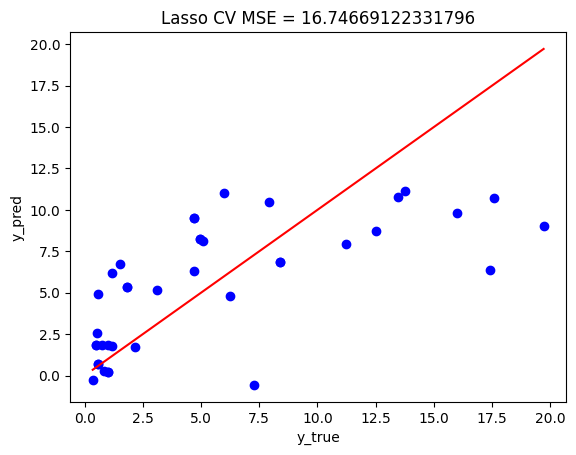

In [10]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Lasso')

# Tree

In [11]:
tree = DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 7, 9, 11],
    'min_samples_leaf':[1, 2]
}

grid = GridSearchCV(tree, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 12 candidates, totalling 468 fits
[CV 1/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 1/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-1.835 total time=   0.0s
[CV 2/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 2/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-51.852 total time=   0.0s
[CV 3/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 3/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-118.478 total time=   0.0s
[CV 4/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 4/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-35.130 total time=   0.0s
[CV 5/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 5/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-58.342 total time=   0.0s
[CV 6/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 6/39; 1/12] 

[CV 31/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-6.128 total time=   0.0s
[CV 32/39; 2/12] START max_depth=2, min_samples_leaf=2..........................
[CV 32/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-5.651 total time=   0.0s
[CV 33/39; 2/12] START max_depth=2, min_samples_leaf=2..........................
[CV 33/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-11.801 total time=   0.0s
[CV 34/39; 2/12] START max_depth=2, min_samples_leaf=2..........................
[CV 34/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-0.251 total time=   0.0s
[CV 35/39; 2/12] START max_depth=2, min_samples_leaf=2..........................
[CV 35/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-1.592 total time=   0.0s
[CV 36/39; 2/12] START max_depth=2, min_samples_leaf=2..........................
[CV 36/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-0.025 total time=   0.0s
[CV 37/39; 2/12] START max_depth=2, min_samples_leaf=2..................

[CV 22/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-0.006 total time=   0.0s
[CV 23/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 23/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-0.053 total time=   0.0s
[CV 24/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 24/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-2.633 total time=   0.0s
[CV 25/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 25/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-0.159 total time=   0.0s
[CV 26/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 26/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-16.559 total time=   0.0s
[CV 27/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 27/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-20.605 total time=   0.0s
[CV 28/39; 4/12] START max_depth=3, min_samples_leaf=2.................

[CV 10/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-355.140 total time=   0.0s
[CV 11/39; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 11/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-7.092 total time=   0.0s
[CV 12/39; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 12/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-27.196 total time=   0.0s
[CV 13/39; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 13/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-0.071 total time=   0.0s
[CV 14/39; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 14/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-0.613 total time=   0.0s
[CV 15/39; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 15/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-27.139 total time=   0.0s
[CV 16/39; 6/12] START max_depth=5, min_samples_leaf=2...............

[CV 37/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 38/39; 7/12] START max_depth=7, min_samples_leaf=1..........................
[CV 38/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 39/39; 7/12] START max_depth=7, min_samples_leaf=1..........................
[CV 39/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 1/39; 8/12] START max_depth=7, min_samples_leaf=2...........................
[CV 1/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-1.010 total time=   0.0s
[CV 2/39; 8/12] START max_depth=7, min_samples_leaf=2...........................
[CV 2/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-0.460 total time=   0.0s
[CV 3/39; 8/12] START max_depth=7, min_samples_leaf=2...........................
[CV 3/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-15.556 total time=   0.0s
[CV 4/39; 8/12] START max_depth=7, min_samples_leaf=2......................

[CV 24/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-7.889 total time=   0.0s
[CV 25/39; 9/12] START max_depth=9, min_samples_leaf=1..........................
[CV 25/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-0.395 total time=   0.0s
[CV 26/39; 9/12] START max_depth=9, min_samples_leaf=1..........................
[CV 26/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-10.513 total time=   0.0s
[CV 27/39; 9/12] START max_depth=9, min_samples_leaf=1..........................
[CV 27/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-0.138 total time=   0.0s
[CV 28/39; 9/12] START max_depth=9, min_samples_leaf=1..........................
[CV 28/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-41.703 total time=   0.0s
[CV 29/39; 9/12] START max_depth=9, min_samples_leaf=1..........................
[CV 29/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-0.062 total time=   0.0s
[CV 30/39; 9/12] START max_depth=9, min_samples_leaf=1.................

[CV 6/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-0.092 total time=   0.0s
[CV 7/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 7/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-27.644 total time=   0.0s
[CV 8/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 8/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-32.290 total time=   0.0s
[CV 9/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 9/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-6.396 total time=   0.0s
[CV 10/39; 11/12] START max_depth=11, min_samples_leaf=1........................
[CV 10/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-366.273 total time=   0.0s
[CV 11/39; 11/12] START max_depth=11, min_samples_leaf=1........................
[CV 11/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-13.969 total time=   0.0s
[CV 12/39; 11/12] START max_depth=11, min_samples_leaf=1....

[CV 26/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-10.513 total time=   0.0s
[CV 27/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 27/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-20.605 total time=   0.0s
[CV 28/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 28/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-46.774 total time=   0.0s
[CV 29/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 29/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-0.005 total time=   0.0s
[CV 30/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 30/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-28.681 total time=   0.0s
[CV 31/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 31/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-0.068 total time=   0.0s
[CV 32/39; 12/12] START max_depth=11, min_samples_leaf=2.

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000020004984820>,
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [12]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 1}

In [ ]:
# Uncomment to get model
# tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=1)

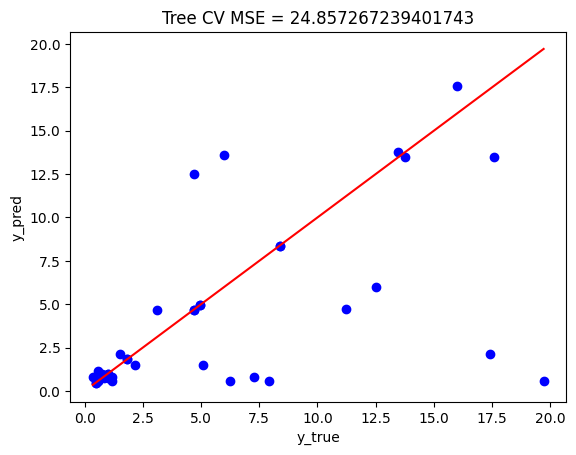

In [13]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Tree')

# RF

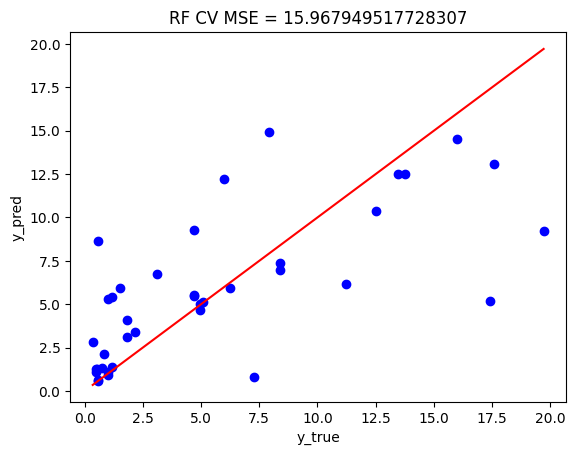

In [14]:
rf = RandomForestRegressor(random_state=42)
cross_validate_and_plot(rf, X, y, cv=lo, metric=mse, title='RF')

In [16]:
rf.fit(X, y)

RandomForestRegressor(random_state=42)

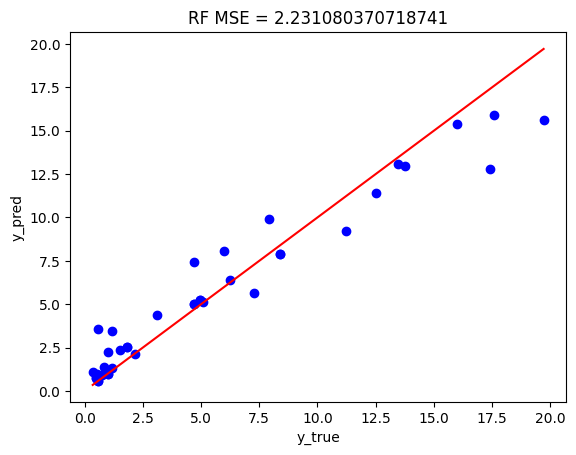

In [17]:
plot_result(rf, X, y, metric=mse, title='RF')

In [18]:
dump(rf, 'rf_mr_hcp_a3#2.joblib')

['rf_mr_hcp_a3#2.joblib']

# CB

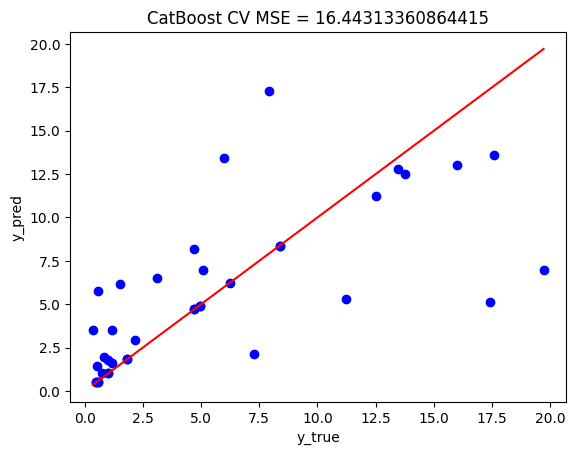

In [15]:
cb = CatBoostRegressor(verbose=0)
cross_validate_and_plot(cb, X, y, cv=lo, metric=mse, title='CatBoost')